In [535]:
import pandas as pd

In [536]:
import os
print(os.listdir("../Titanic Survivors/dataSet"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [537]:
df=pd.read_csv("./dataSet/train.csv") #To read trainig dataset to variable df
dft=pd.read_csv("./dataSet/test.csv") #To read testing dataset to variable dft

In [538]:
df.head() #This function displays the first few(5 by default) observations in the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [539]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [540]:
df=df.fillna(0) #fillna fills all the NaN values with the integer passed inside the function
dft=dft.fillna(0)

In [541]:
df=df.replace(['male','female'],[0,1]) #Here we are replacing all the stringss male and female with 0 and 1 respectively
dft=dft.replace(['male','female'],[0,1])

In [542]:
df=df.drop(columns=['PassengerId']) #We are dropping PassengerId from df since its of no use in training dataset

In [543]:
out_targets=dft['PassengerId'].values #We are collecting the values of PassengerId from Testing Dataset

In [544]:
cols=[i for i in df.describe()]
colt=[j for j in dft.describe()] #We are saving the attribute names into a list col for training set and colt for testing set
colt

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [545]:
dfRed=df[cols]
dfRed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [546]:
dftRed=dft[colt[1:]]
dftRed.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [547]:
trainLabels=dfRed['Survived'].values
dfRed=dfRed.drop(columns=['Survived'])
trainData=dfRed.values
testData=dftRed.values

In [548]:
print(trainData.shape,trainLabels.shape)
print(testData.shape)

(891, 6) (891,)
(418, 6)


In [549]:
mean=trainData.mean(axis=0)
std=trainData.std(axis=0)
trainData-=mean
trainData/=std

In [550]:
meant=testData.mean(axis=0)
stdt=testData.std(axis=0)
testData-=meant
testData/=stdt #Now the dataset is finally normalized into bein close to 0 and variance nearly unit.

In [551]:
from keras import models,layers,optimizers

In [552]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(trainData,trainLabels,test_size=0.20,shuffle=True)

In [553]:
print(x_train.shape,x_test.shape)

(712, 6) (179, 6)


In [554]:
index=200
x_val=x_train[:index]
y_val=y_train[:index]

In [555]:
partial_x_train = x_train[index:]
partial_y_train=y_train[index:]

In [556]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [557]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

In [558]:
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [559]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=500,
                   batch_size=32,
                   validation_data=(x_val,y_val),
                   verbose=1)

Epoch 1/500
16/16 [==============================] - 4s 20ms/step - loss: 0.8632 - accuracy: 0.4629 - val_loss: 0.7535 - val_accuracy: 0.4200
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7977 - accuracy: 0.4961 - val_loss: 0.7390 - val_accuracy: 0.4150
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.8249 - accuracy: 0.5293 - val_loss: 0.7268 - val_accuracy: 0.5200
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.8039 - accuracy: 0.4922 - val_loss: 0.7156 - val_accuracy: 0.5600
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7683 - accuracy: 0.5273 - val_loss: 0.7052 - val_accuracy: 0.5750
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7470 - accuracy: 0.5293 - val_loss: 0.6971 - val_accuracy: 0.5800
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7239 - accuracy: 0.5488 - val_loss: 0.6902 - val_accuracy: 0.5900
Epoch 8/500


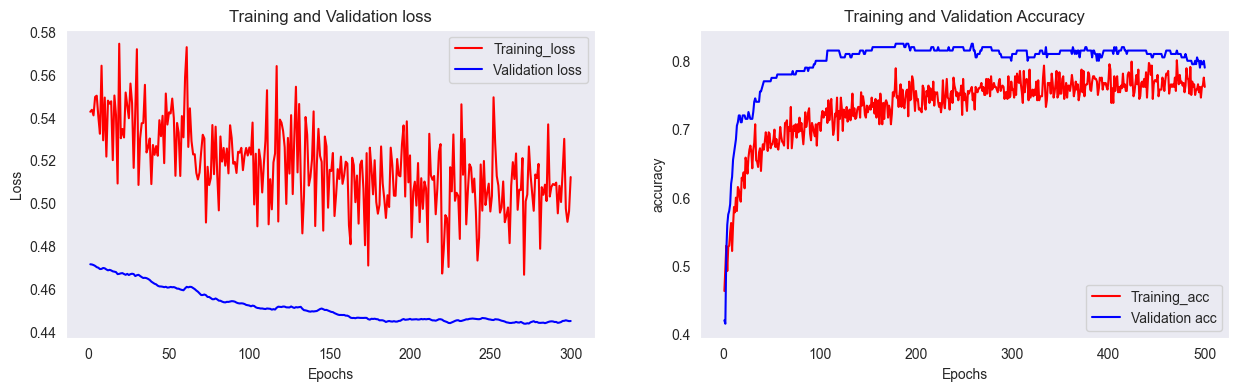

In [560]:
hist = history.history
acc=hist['accuracy']
a=200
b=len(acc)
val_loss=hist['val_loss'][a:b]
loss=hist['loss'][a:b]
val_acc=hist['val_accuracy']
epc = range(1,(b-a)+1)

plt.figure(figsize=(15,4))
plt.clf()
plt.subplot(1,2,1)
plt.plot(epc, loss, 'r', label='Training_loss')
plt.plot(epc, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

epc=range(1,len(acc)+1)
plt.subplot(1,2,2)
plt.plot(epc, acc, 'r', label='Training_acc')
plt.plot(epc, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()


plt.show()

In [561]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(trainData, trainLabels,
                   epochs=500,
                   batch_size=32,
                   verbose=1)

Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 0.7241 - accuracy: 0.5859
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.5903
Epoch 3/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.6184
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5960
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6139
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6229
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6218
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6251
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6341
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6487
Epoch 11/

In [562]:
result=model.evaluate(x_test,y_test)
result

6/6 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8268


[0.4433166980743408, 0.826815664768219]

In [563]:
prediction=model.predict(testData)
prediction

14/14 [==============================] - 0s 1ms/step


array([[0.15107119],
       [0.27457693],
       [0.16508003],
       [0.15886296],
       [0.3482326 ],
       [0.1721034 ],
       [0.4092629 ],
       [0.30558947],
       [0.54573417],
       [0.20265593],
       [0.18267457],
       [0.30718276],
       [0.9695653 ],
       [0.18386385],
       [0.9649672 ],
       [0.83471704],
       [0.20212948],
       [0.16296077],
       [0.32396734],
       [0.29757372],
       [0.28438252],
       [0.24828875],
       [0.9720276 ],
       [0.3781644 ],
       [0.8649815 ],
       [0.148902  ],
       [0.9616717 ],
       [0.16152878],
       [0.32451364],
       [0.23524259],
       [0.21264884],
       [0.26149413],
       [0.3186697 ],
       [0.5345129 ],
       [0.34066826],
       [0.1653748 ],
       [0.57960236],
       [0.53921753],
       [0.16167791],
       [0.27398923],
       [0.20164765],
       [0.33446854],
       [0.14533022],
       [0.8437404 ],
       [0.964483  ],
       [0.15993465],
       [0.31210023],
       [0.182

In [564]:
pred=[1 if prediction[i]>0.25 else 0 for i in range(len(testData))]
pred

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [565]:
res=pd.DataFrame()
survivalData=pd.read_csv('./dataSet/gender_submission.csv')
survivalData

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [566]:
res['PassengerId']=out_targets
res['Survived']=pred
res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [568]:
res.to_csv("Submission.csv",index=True)

In [569]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("titanicSurvivalPred.h5")